In [494]:
from math import sin,cos,radians
from IPython.display import display,Math,Markdown,Latex
import numpy as np

def matex(A,B,C):
    latex_matrix = r'\begin{bmatrix}' + ''.join([r' & '.join(map(str, row)) + r' \\' for row in B]) + r'\end{bmatrix}'
    display(Markdown(rf'$${A}={latex_matrix} {C}$$'))

In [495]:
file_path='samplefile.txt'

with open(file_path, 'r') as file:
    lines = file.readlines()

Ef, nuf = map(float, lines[0].strip().split(', '))
Em, num = map(float, lines[1].strip().split(', '))
vf = float(lines[2].strip())
Xt,Xc,Yt,Yc,S = (map(int, lines[3].strip().split(', ')))
layup = list(map(int, lines[4].strip().split(', ')))
no_layers=len(layup)
t = float(lines[5].strip())
tl=t/no_layers
Nx,Ny,Nxy = (map(int, lines[6].strip().split(', ')))
Mx,My,Mxy = (map(int, lines[7].strip().split(', ')))

variables=['E_f',r'\nu_f','E_m',r'\nu_m','v_f','X_t','X_c','Y_t','Y_c','S',r'\text{layup}',r'\text{No of Layers}','t','tl','N_x','N_y','N_{xy}','M_x','M_y','M_xy']
variable_values=[Ef,nuf,Em,num,vf,Xt,Xc,Yt,Yc,S,layup,no_layers,t,tl,Nx,Ny,Nxy,Mx,My,Mxy]
variable_units=['\mathrm{MPa}', '', '\mathrm{MPa}', '', '', '\mathrm{Mpa}', '\mathrm{Mpa}', '\mathrm{Mpa}', '\mathrm{Mpa}', '\mathrm{Mpa}', '\mathrm{degrees}', '', '\mathrm{mm}', '\mathrm{mm}', '\mathrm{N/m}', '\mathrm{N/m}', '\mathrm{N/m}', '\mathrm{Nm/m}', '\mathrm{Nm/m}', '\mathrm{Nm/m}']


for i,j,k in zip(variables,variable_values,variable_units):
    display(Latex(f'$${i} = {j}\;{k}''$$'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [496]:
def srom(v,p1,p2):
    p=v*p1+(1-v)*p2
    return p

def irom(v,p1,p2):
    p=(v/p1+(1-v)/p2)**-1
    return p

def GK(E,nu):
    G=E/(2*(1+nu))
    K=E/(3*(1-2*nu))
    return np.round([G,K],decimals=6)

def enggconst(Ef,nuf,Em,num,vf):
    E1c=srom(vf,Ef,Em)
    E2c=irom(vf,Ef,Em)
    nu12c=srom(vf,nuf,num)
    G12f=GK(Ef,nuf)[0]
    G12m=GK(Em,num)[0]
    G12c=irom(vf,G12f,G12m)
    return np.round([E1c,E2c,nu12c,G12c],decimals=6)

E1,E2,nu12,G12 = enggconst(Ef,nuf,Em,num,vf)

for i, j, k in zip(['E_1', 'E_2', r'\nu_{12}', 'G_{12}'], [E1, E2, nu12, G12], ['\mathrm{MPa}', '\mathrm{MPa}', '', '\mathrm{MPa}']):
    display(Latex(f'$${i}={j}\;{k}$$'))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [497]:
def Qlocal_func(E1,E2,nu12,G12):
    S=np.array([[1/E1,-nu12/E1,0],[-nu12/E1,1/E2,0],[0,0,1/G12]])
    Q=np.round(np.linalg.inv(S),decimals=6)
    return [Q,S]

Qlocal=Qlocal_func(E1,E2,nu12,G12)[0]

matex("Q^{local}",Qlocal,"\mathrm{MPa}")

$$Q^{local}=\begin{bmatrix}34539.610728 & 1618.547862 & 0.0 \\1618.547862 & 5350.571445 & 0.0 \\0.0 & 0.0 & 1932.05603 \\\end{bmatrix} \mathrm{MPa}$$

In [498]:
def tsigf(theta):
    m=cos(radians(theta))
    n=sin(radians(theta))
    tsig=np.array([[m**2,n**2,2*m*n],[n**2,m**2,-2*m*n],[-m*n,m*n,(m**2-n**2)]])
    return tsig

def tepsf(theta):
    m=cos(radians(theta))
    n=sin(radians(theta))
    teps=np.array([[m**2,n**2,m*n],[n**2,m**2,-m*n],[-2*m*n,2*m*n,(m**2-n**2)]])
    return teps

def Qglobal_func(theta,Qlocal):
    tsig=tsigf(theta)
    teps=tepsf(theta)
    tsiginv=np.linalg.inv(tsig)
    Q=np.round(np.dot(np.dot(tsiginv,Qlocal),teps),decimals=6)
    return Q

def Qlist_func(layup,Qlocal):
    Qlist=[]
    for i in layup:
        Qlist.append(Qglobal_func(i,Qlocal))
    return Qlist

Qlist=Qlist_func(layup,Qlocal)

for i,j,k in zip(Qlist,layup,range(no_layers)):
    display(Latex(rf'For $\theta={j}^\circ$,'))
    matex(f"Q^{k+1}",i,"\mathrm{MPa}")

<IPython.core.display.Latex object>

$$Q^1=\begin{bmatrix}34539.610728 & 1618.547862 & 0.0 \\1618.547862 & 5350.571445 & 0.0 \\0.0 & 0.0 & 1932.05603 \\\end{bmatrix} \mathrm{MPa}$$

<IPython.core.display.Latex object>

$$Q^2=\begin{bmatrix}12713.875504 & 8849.763444 & 7297.259821 \\8849.763444 & 12713.875504 & 7297.259821 \\7297.259821 & 7297.259821 & 9163.271612 \\\end{bmatrix} \mathrm{MPa}$$

<IPython.core.display.Latex object>

$$Q^3=\begin{bmatrix}12713.875504 & 8849.763444 & -7297.259821 \\8849.763444 & 12713.875504 & -7297.259821 \\-7297.259821 & -7297.259821 & 9163.271612 \\\end{bmatrix} \mathrm{MPa}$$

<IPython.core.display.Latex object>

$$Q^4=\begin{bmatrix}5350.571445 & 1618.547862 & 0.0 \\1618.547862 & 34539.610728 & 0.0 \\0.0 & 0.0 & 1932.05603 \\\end{bmatrix} \mathrm{MPa}$$

In [499]:
def zf(t,no_layers):
    z=[-t/2]
    for i in range(no_layers):
        z.append(z[i]+(t/no_layers))
    return np.round(z,decimals=6)

z=zf(t,no_layers)

print(f'z-coordinates are {z} mm')

z-coordinates are [-0.6 -0.3  0.   0.3  0.6] mm


In [500]:
def ABD(Qlist,z):
    A=np.zeros((3,3))
    B=np.zeros((3,3))
    D=np.zeros((3,3))
    nl=len(z)-1
    for i,j in zip(Qlist,range(nl)):
        A=A+i*(z[j+1]-z[j])
        B=B+i*(z[j+1]**2-z[j]**2)
        D=D+i*(z[j+1]**3-z[j]**3)
    A=np.round(A)
    B=np.round(B/2)
    D=np.round(D/3)
    return [A,B,D]

A,B,D=ABD(Qlist,z)

matex("A",A,"\mathrm{MN/mm}")
matex("B",B,"\mathrm{MN}")
matex("D",D,"\mathrm{MNmm}")

$$A=\begin{bmatrix}19595.0 & 6281.0 & 0.0 \\6281.0 & 19595.0 & 0.0 \\0.0 & 0.0 & 6657.0 \\\end{bmatrix} \mathrm{MN/mm}$$

$$B=\begin{bmatrix}-3941.0 & 0.0 & -657.0 \\0.0 & 3941.0 & -657.0 \\-657.0 & -657.0 & 0.0 \\\end{bmatrix} \mathrm{MN}$$

$$D=\begin{bmatrix}2742.0 & 363.0 & 0.0 \\363.0 & 2742.0 & 0.0 \\0.0 & 0.0 & 408.0 \\\end{bmatrix} \mathrm{MNmm}$$

In [501]:
def Cf(A,B,D):
    c=np.concatenate((np.concatenate((A,B),axis=1),np.concatenate((B,D),axis=1)),axis=0)
    return c

C=Cf(A,B,D)

matex(r'\begin{bmatrix}A & B \\ B & D \\\end{bmatrix}',C,'')

C=np.linalg.inv(C)

matex(r'\begin{bmatrix}A & B \\ B & D \\\end{bmatrix}^{-1}',C,'')

$$\begin{bmatrix}A & B \\ B & D \\\end{bmatrix}=\begin{bmatrix}19595.0 & 6281.0 & 0.0 & -3941.0 & 0.0 & -657.0 \\6281.0 & 19595.0 & 0.0 & 0.0 & 3941.0 & -657.0 \\0.0 & 0.0 & 6657.0 & -657.0 & -657.0 & 0.0 \\-3941.0 & 0.0 & -657.0 & 2742.0 & 363.0 & 0.0 \\0.0 & 3941.0 & -657.0 & 363.0 & 2742.0 & 0.0 \\-657.0 & -657.0 & 0.0 & 0.0 & 0.0 & 408.0 \\\end{bmatrix} $$

$$\begin{bmatrix}A & B \\ B & D \\\end{bmatrix}^{-1}=\begin{bmatrix}9.079161688898968e-05 & -3.275835736041999e-05 & 1.61511193000434e-05 & 0.00012989328478899925 & 3.375664090413456e-05 & 9.345061644674092e-05 \\-3.275835736041999e-05 & 9.079161688898967e-05 & -1.61511193000434e-05 & -3.375664090413456e-05 & -0.00012989328478899928 & 9.345061644674091e-05 \\1.61511193000434e-05 & -1.61511193000434e-05 & 0.00016098796085211892 & 5.456381688931181e-05 & 5.4563816889311816e-05 & -4.560261503619367e-22 \\0.00012989328478899925 & -3.375664090413455e-05 & 5.4563816889311816e-05 & 0.000566233042153469 & -1.3369527644871313e-05 & 0.00015480827213812777 \\3.375664090413456e-05 & -0.00012989328478899928 & 5.4563816889311816e-05 & -1.3369527644871308e-05 & 0.0005662330421534692 & -0.00015480827213812777 \\9.345061644674092e-05 & 9.345061644674091e-05 & 1.2082438092356867e-22 & 0.00015480827213812775 & -0.00015480827213812775 & 0.00275194634806622 \\\end{bmatrix} $$

In [502]:
load=np.array([Nx/1000,Ny/1000,Nxy/1000,Mx,My,Mxy])

print(f'Load = {load}')

Load = [ 0.1  0.1  0.  50.  25.  12. ]


In [503]:
res=np.dot(C,load.reshape(-1,1))

mps=np.round(res[:3],decimals=6)
curv=np.round(res[3:],decimals=6)

matex(r'\text{Midplane Strains }\epsilon_0',mps,'')
matex(r'\text{Curvature }\kappa',curv,'')

$$\text{Midplane Strains }\epsilon_0=\begin{bmatrix}0.008466 \\-0.003808 \\0.004092 \\\end{bmatrix} $$

$$\text{Curvature }\kappa=\begin{bmatrix}0.029845 \\0.01162 \\0.036912 \\\end{bmatrix} $$

In [504]:
strn=[]
for i in range(no_layers):
    strn.append(mps +((z[i+1]+z[i])/2)*curv)

for i in range(no_layers):
    matex(rf'\epsilon^{i+1}',strn[i],'')

$$\epsilon^1=\begin{bmatrix}-0.00496425 \\-0.009037 \\-0.012518399999999997 \\\end{bmatrix} $$

$$\epsilon^2=\begin{bmatrix}0.00398925 \\-0.005551 \\-0.0014447999999999996 \\\end{bmatrix} $$

$$\epsilon^3=\begin{bmatrix}0.01294275 \\-0.002065 \\0.0096288 \\\end{bmatrix} $$

$$\epsilon^4=\begin{bmatrix}0.02189625 \\0.001420999999999999 \\0.020702399999999996 \\\end{bmatrix} $$

In [505]:
strs = []
for i in range(no_layers):
    strs.append(np.dot(Qlist[i],strn[i]))

for i in range(no_layers):
    matex(rf'\sigma^{i+1}',strs[i],'')

$$\sigma^1=\begin{bmatrix}-186.09007958536802 \\-56.3879903723985 \\-24.186250205951993 \\\end{bmatrix} $$

$$\sigma^2=\begin{bmatrix}-8.949290012692805 \\-45.8138850931078 \\-24.635590350464355 \\\end{bmatrix} $$

$$\sigma^3=\begin{bmatrix}76.0138953030912 \\18.022267534626195 \\8.853541679742861 \\\end{bmatrix} $$

$$\sigma^4=\begin{bmatrix}119.45740651448324 \\84.52091546780547 \\39.998196755471994 \\\end{bmatrix} $$

In [506]:
strs12= []
for i in range(no_layers):
    strs12.append(np.dot(tsigf(layup[i]),strs[i]))

for i in range(no_layers):
    matex(rf'\sigma_L^{i+1}',strs12[i],'')

$$\sigma_L^1=\begin{bmatrix}-186.09007958536802 \\-56.3879903723985 \\-24.186250205951993 \\\end{bmatrix} $$

$$\sigma_L^2=\begin{bmatrix}-52.01717790336467 \\-2.7459972024359445 \\-18.4322975402075 \\\end{bmatrix} $$

$$\sigma_L^3=\begin{bmatrix}38.164539739115845 \\55.87162309860157 \\28.99581388423251 \\\end{bmatrix} $$

$$\sigma_L^4=\begin{bmatrix}84.52091546780547 \\119.45740651448324 \\-39.998196755471994 \\\end{bmatrix} $$

In [507]:
import sympy as sym

r=sym.symbols('r')

def hoffman(xt,xc,yt,yc,s,xx,yy,xy,r):
    hf = (1/xt-1/xc)*r*xx+(1/yt-1/yc)*r*yy+(r*xx)**2/(xt*xc)+(r*yy)**2/(yt*yc)+(r*xy/s)**2-r**2*xx*yy/(xt*xc)
    return hf

In [508]:
hoff=[]
for i in range(no_layers):
    hoff.append(hoffman(Xt,Xc,Yt,Yc,S,strs12[i][0],strs12[i][1],strs12[i][2],r))
hoff=sym.Matrix(hoff)

eq=sym.Eq(sym.ones(4,1),hoff)
display(eq)

Eq(Matrix([
[1],
[1],
[1],
[1]]), Matrix([
[ 4.62142891213794*r**2],
[0.802910325634401*r**2],
[ 2.52628859490966*r**2],
[ 7.97251155771992*r**2]]))

In [509]:
mos=[]
for i in range(no_layers):
    k=sym.solve([sym.Eq(1,hoff[i])],[r])
    mos.append(k[1])

matex(r'\text{Margin of safety}',mos,'')

$$\text{Margin of safety}=\begin{bmatrix}0.465170174904640 \\1.11600586879828 \\0.629156255895963 \\0.354162374919420 \\\end{bmatrix} $$

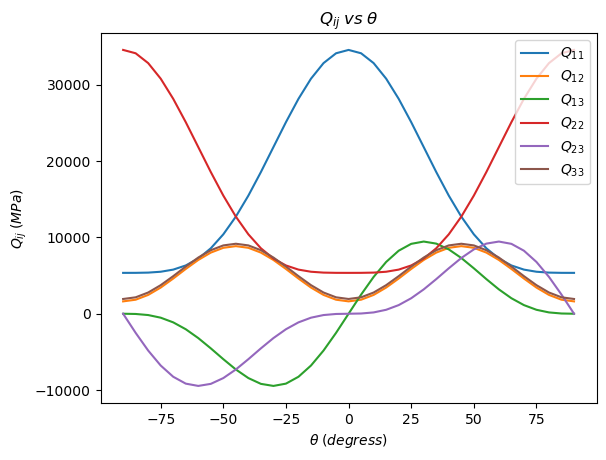

Qij  Max Values  Min Values
Q11     34540.0      5351.0
Q12      8850.0      1619.0
Q13      9451.0     -9451.0
Q22     34540.0      5351.0
Q23      9451.0     -9451.0
Q33      9163.0      1932.0


In [516]:
import matplotlib.pyplot as plt

theta_values=np.linspace(-90,90,37)

Q_values=[]
for i in theta_values:
    Q_values.append(Qglobal_func(i,Qlocal))
    
labels = [['$Q_{11}$','$Q_{12}$','$Q_{13}$'],['$Q_{21}$','$Q_{22}$','$Q_{23}$'],['$Q_{31}$','$Q_{32}$','$Q_{33}$']]
for i,j in zip([0,0,0,1,1,2],[0,1,2,1,2,2]):
    data=[]
    for k in range(len(theta_values)):
        data.append(Q_values[k][i][j])
    plt.plot(theta_values,data,label=labels[i][j])    
    
plt.legend()
plt.xlabel(r'$\theta\;(degress)$')
plt.ylabel(r'$Q_{ij}\;(MPa)$')
plt.title(r'$Q_{ij}\;vs\;\theta$')
plt.show()

max_values = np.round([max([Q_values[k][i][j] for k in range(len(theta_values))]) for i, j in zip([0, 0, 0, 1, 1, 2], [0, 1, 2, 1, 2, 2])])
min_values = np.round([min([Q_values[k][i][j] for k in range(len(theta_values))]) for i, j in zip([0, 0, 0, 1, 1, 2], [0, 1, 2, 1, 2, 2])])
Q_array=['Q11','Q12','Q13','Q22','Q23','Q33']

table={'Qij':Q_array,'Max Values':max_values,'Min Values':min_values}

from pandas import DataFrame

table=DataFrame(table)
print(table.to_string(index=False))

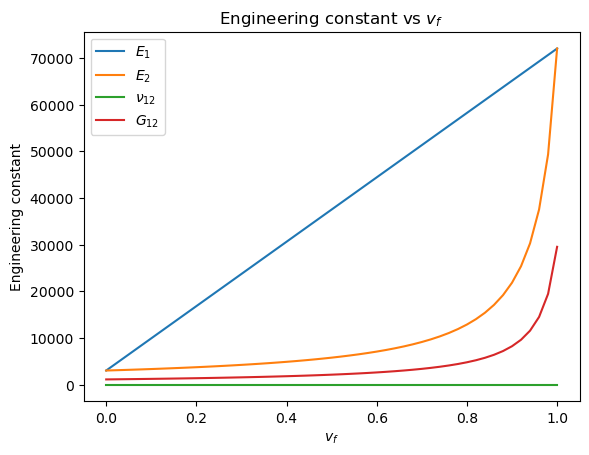

Engg. Const  Max Values  Min Values
         E1   72000.000    3000.000
         E2   72000.000    3000.000
       nu12       0.370       0.220
        G12   29508.197    1094.891


In [517]:
vf_values=np.linspace(0,1,51)

const_values=[]
for i in vf_values:
    const_values.append(enggconst(Ef,nuf,Em,num,i))

labels = [r'$E_1$',r'$E_2$',r'$\nu_{12}$',r'$G_{12}$']

for i in range(len(labels)):
    data=[]
    for k in range(len(vf_values)):
        data.append(const_values[k][i])
    plt.plot(vf_values,data,label=labels[i])

plt.legend()
plt.xlabel(r'$v_f$')
plt.ylabel('Engineering constant')
plt.title(r'Engineering constant vs $v_f$')
plt.show()

max_values = np.round([max([const_values[k][i] for k in range(len(vf_values))]) for i in range(len(labels))],decimals=3)
min_values = np.round([min([const_values[k][i] for k in range(len(vf_values))]) for i in  range(len(labels))],decimals=3)
items=['E1','E2','nu12','G12']

table={'Engg. Const':items,'Max Values':max_values,'Min Values':min_values}

table=DataFrame(table)
print(table.to_string(index=False))


In [518]:
def Qofz(z,zlist,qlist):
    Q=[]
    if z in zlist:
        if z==zlist[0]:
            Q.append(qlist[0])
        elif z==zlist[-1]:
            Q.append(qlist[-1])
        else:
            a=np.array((np.where(zlist == z)[0])-1).astype(int)
            Q.append(qlist[a[0]])
            a=np.array(np.where(zlist == z)[0]).astype(int)
            Q.append(qlist[a[0]])
    for i in range(no_layers):
        if zlist[i]<z<zlist[i+1]:
            Q.append(qlist[i])
    return np.array(Q).astype(int)

def stress(z,zlist,qlist,mps,curv):
    strain=mps+z*curv
    stress=np.dot(Qofz(z,zlist,qlist),strain)
    return stress        

z_values=np.linspace(z[0],z[-1],21)

stress_values=[]
for i in z_values:
    a=stress(i,z,Qlist,mps,curv)
    if len(a)==2:
        stress_values.append(a[0])
        stress_values.append(a[1])
    else:
        stress_values.append(a[0])
labels=[r'$\sigma_1$',r'$\sigma_2$',r'$\sigma_{12}$']

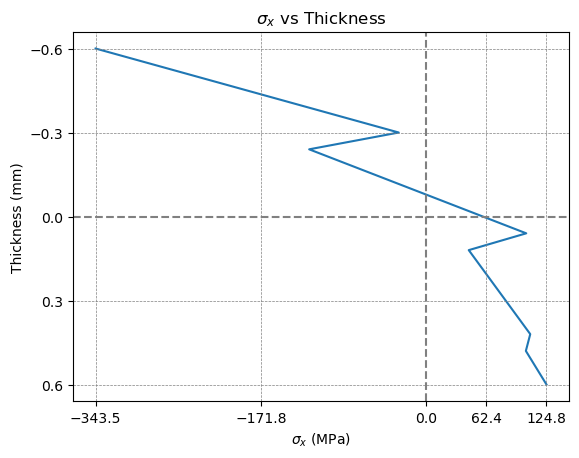

In [519]:
sigmax_values=[]
for k in range(len(z_values)):
    sigmax_values.append(stress_values[k][0])

plt.plot(sigmax_values,z_values,label=labels[0])
plt.gca().invert_yaxis()
for y_value in z:
    if y_value==0:
        plt.axhline(y=y_value, color='gray', linestyle='--', linewidth=1.5)
    else:
        plt.axhline(y=y_value, color='gray', linestyle='--', linewidth=0.5)
for x_value in [np.min(sigmax_values),np.min(sigmax_values)/2,0,np.max(sigmax_values)/2,np.max(sigmax_values)]:
    if x_value==0:
        plt.axvline(x=x_value, color='gray', linestyle='--', linewidth=1.5)
    else:
        plt.axvline(x=x_value, color='gray', linestyle='--', linewidth=0.5)
plt.yticks(z)
plt.xticks([np.min(sigmax_values),np.min(sigmax_values)/2,0,np.max(sigmax_values)/2,np.max(sigmax_values)])
plt.xlabel(r'$\sigma_x$ (MPa)')
plt.ylabel('Thickness (mm)')
plt.title(r'$\sigma_x$ vs Thickness')
plt.show()

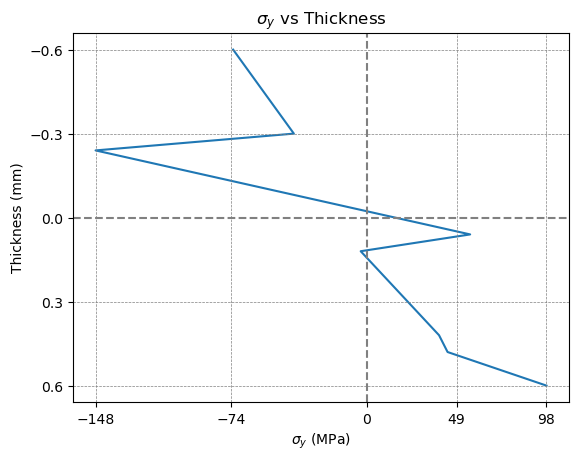

In [520]:
sigmay_values=[]
for k in range(len(z_values)):
    sigmay_values.append(stress_values[k][1])

plt.plot(sigmay_values,z_values,label=labels[0])
plt.gca().invert_yaxis()
for y_value in z:
    if y_value==0:
        plt.axhline(y=y_value, color='gray', linestyle='--', linewidth=1.5)
    else:
        plt.axhline(y=y_value, color='gray', linestyle='--', linewidth=0.5)
for x_value in [np.min(sigmay_values),np.min(sigmay_values)/2,0,np.max(sigmay_values)/2,np.max(sigmay_values)]:
    if x_value==0:
        plt.axvline(x=x_value, color='gray', linestyle='--', linewidth=1.5)
    else:
        plt.axvline(x=x_value, color='gray', linestyle='--', linewidth=0.5)
plt.yticks(z)
plt.xticks([np.min(sigmay_values),np.min(sigmay_values)/2,0,np.max(sigmay_values)/2,np.max(sigmay_values)])
plt.xlabel(r'$\sigma_y$ (MPa)')
plt.ylabel('Thickness (mm)')
plt.title(r'$\sigma_y$ vs Thickness')
plt.show()

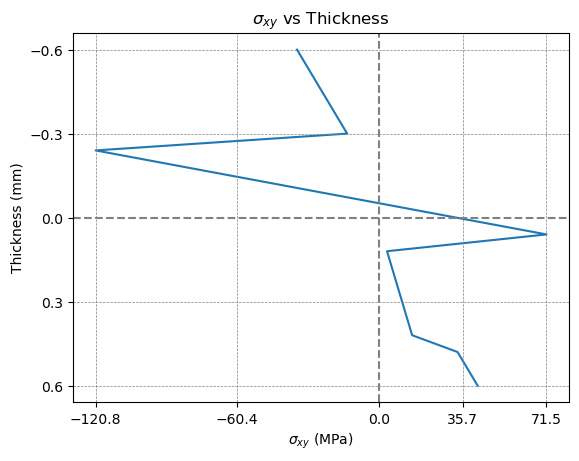

In [521]:
sigmaxy_values=[]
for k in range(len(z_values)):
    sigmaxy_values.append(stress_values[k][2])

plt.plot(sigmaxy_values,z_values,label=labels[0])
plt.gca().invert_yaxis()
for y_value in z:
    if y_value==0:
        plt.axhline(y=y_value, color='gray', linestyle='--', linewidth=1.5)
    else:
        plt.axhline(y=y_value, color='gray', linestyle='--', linewidth=0.5)
for x_value in [np.min(sigmaxy_values),np.min(sigmaxy_values)/2,0,np.max(sigmaxy_values)/2,np.max(sigmaxy_values)]:
    if x_value==0:
        plt.axvline(x=x_value, color='gray', linestyle='--', linewidth=1.5)
    else:
        plt.axvline(x=x_value, color='gray', linestyle='--', linewidth=0.5)
plt.yticks(z)
plt.xticks([np.min(sigmaxy_values),np.min(sigmaxy_values)/2,0,np.max(sigmaxy_values)/2,np.max(sigmaxy_values)])
plt.xlabel(r'$\sigma_{xy}$ (MPa)')
plt.ylabel('Thickness (mm)')
plt.title(r'$\sigma_{xy}$ vs Thickness')
plt.show()